# calculating Rs - energy balance

## 1. importing all packages and connecting to GEE

In [ ]:
pip install cftime

In [ ]:
pip install --no-binary shapely shapely --force

     |████████████████████████████████| 389kB 12.3MB/s 
Skipping wheel build for shapely, due to binaries being disabled for it.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Shapely 1.7.1
    Uninstalling Shapely-1.7.1:
      Successfully uninstalled Shapely-1.7.1
    Running setup.py install for shapely ... done


In [ ]:
pip install cartopy

     |████████████████████████████████| 12.1MB 293kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 225kB 54.3MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.whl size=12516153 sha256=529cf34d9d77545813c769d36aec46fac65141aae39a17bc43ba6aac5f96f0e2
  Stored in directory: /root/.cache/pip/wheels/45/7f/3b/37879587817fd1bbbee7b47312e2401b4f542cccf2fbe9b4ee
Successfully built cartopy
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl size=37264 sha256=893d99c9f52acf8415bb5a84d3c9234a9925a8a4f6b5d2b612fc6f5be8fcaa91
  Stored in directory: /root/.cache/pip/wheels/76/2b/d4/53e6b9a0fb0a9f9f29664cf82605af8bc81d5ab44d987896dd
Successfully built pyshp


In [ ]:
pip install rioxarray

     |████████████████████████████████| 51kB 4.6MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.5MB 18.2MB/s 
     |████████████████████████████████| 19.1MB 1.2MB/s 
     |████████████████████████████████| 92kB 9.2MB/s 
  Created wheel for rioxarray: filename=rioxarray-0.4.0-cp37-none-any.whl size=51187 sha256=ae9bb2ca7b43b0f768fc08353ca38256eb7759cd91e5cdb1d1314e468c7f67a4
  Stored in directory: /root/.cache/pip/wheels/f9/40/0c/6956ed4ac3ac450f97c248d90cd6135b4ed4042709ddd18605
Successfully built rioxarray
  Found existing installation: click 8.0.0
    Uninstalling click-8.0.0:
      Successfully uninstalled click-8.0.0


In [ ]:
pip install geopandas

     |████████████████████████████████| 1.0MB 12.9MB/s 
     |████████████████████████████████| 15.3MB 213kB/s 


In [ ]:
pip install pycrs

  Created wheel for pycrs: filename=PyCRS-1.0.2-cp37-none-any.whl size=32683 sha256=d26b6af2685a5ee75c8f50e07c856ab6302958cfcc82ab63db4823f6d6f0bcdd
  Stored in directory: /root/.cache/pip/wheels/1a/c9/56/648f762bd41fdb03454be51b8a7069795925168833cb61f316
Successfully built pycrs


In [ ]:
import os
import warnings
import cartopy
import rioxarray
import matplotlib.pyplot as plt
import numpy.ma as ma
import xarray as xr
import rioxarray as rio
from shapely.geometry import mapping, box
import rasterio
from rasterio.plot import show
warnings.simplefilter('ignore')
import math
import numpy as np 
import sklearn.metrics as metrics
from osgeo import gdal, gdalconst
from gdalconst import GA_ReadOnly

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import GEE for python and get into your account
import ee

# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=CvSKwvisnYYnze_SxbLNGPKxa7iS3dg7_mLrz3A3hnY&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AY0e-g6U3wdvZ2v-aDo1y8sMgYKshShpP-O5ZKyHQAvs7wSbTpyYadUyHFQ

Successfully saved authorization token.


## 2. download and presenting all the files from GEE

### MODIS and WRF of 10:30

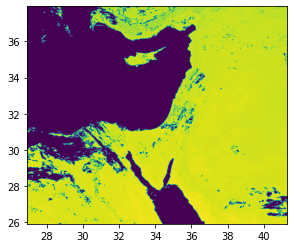

BoundingBox(left=26.913525912220866, bottom=25.92537909968939, right=41.28657045813321, top=37.935854448367394)

In [ ]:
# MODIS 10:30
raster_MOD = rasterio.open('/content/drive/MyDrive/gdrive_folder/LST_MOD11A1_03022019_1000.tif')
show((raster_MOD, 1))

# Let's get the coordinates of the tile
raster_MOD.bounds

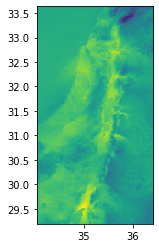

In [ ]:
raster_wrf_1030 = rasterio.open('/content/drive/MyDrive/gdrive_folder/wrf_file.tif')
show((raster_wrf_1030, 1))

In [ ]:
minx, miny = raster_wrf_1030.bounds[0], raster_wrf_1030.bounds[1] # copy the coordinates to HERE...
maxx, maxy = raster_wrf_1030.bounds[2], raster_wrf_1030.bounds[3]
bbox = box(minx, miny, maxx, maxy)
print(bbox)

POLYGON ((36.40014081709865 29.19596706500511, 36.40014081709865 33.63604130188446, 34.03019765529189 33.63604130188446, 34.03019765529189 29.19596706500511, 36.40014081709865 29.19596706500511))


[{'type': 'Polygon', 'coordinates': [[[36.400140817098645, 29.195967065005107], [36.400140817098645, 33.63604130188446], [34.030197655291886, 33.63604130188446], [34.030197655291886, 29.195967065005107], [36.400140817098645, 29.195967065005107]]]}]
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 1600, 'height': 1337, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.008983152841195215, 0.0, 26.913525912220866,
       0.0, -0.008983152841195215, 37.935854448367394)}
4326


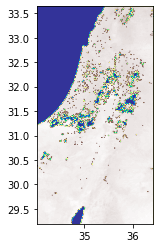

In [ ]:
input_raster =rasterio.open( "/content/drive/MyDrive/gdrive_folder/LST_MOD11A1_03022019_1000.tif")
import geopandas as gpd
from fiona.crs import from_epsg

# Insert the bbox into a GeoDataFrame
geo = gpd.GeoDataFrame({'geometry': bbox}, index=[0], crs=from_epsg(4326))

# Re-project into the same coordinate system as the raster data
geo = geo.to_crs(crs=raster_wrf_1030.crs.data)

# Next we need to get the coordinates of the geometry in such a format that rasterio wants them. 
# This can be conducted easily with following function.
def getFeatures(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]
  
# Get the geometry coordinates by using the function
coords = getFeatures(geo)
print(coords)

from rasterio.mask import mask

# Now we are ready to clip the raster with the polygon using the coords 
# variable that we just created. Clipping the raster can be done easily with 
# the mask function that we imported from rasterio, and specifying clip=True.
out_img, out_transform = mask(input_raster, shapes=coords, crop=True)

# Next, we need to modify the metadata. 
# Let’s start by copying the metadata from the original data file.
out_meta = input_raster.meta.copy()
print(out_meta)

# Next we need to parse the EPSG value from the CRS so that we can create a 
# Proj4 string using PyCRS library (to ensure that the projection information 
# is saved correctly).
epsg_code = int(input_raster.crs.data['init'][5:])
print(epsg_code)

# Now we need to update the metadata with new dimensions, transform (affine) 
# and CRS (as Proj4 text)
import pycrs
out_meta.update({"driver": "GTiff","height": out_img.shape[1],
                 "width": out_img.shape[2],
                 "transform": out_transform,
                 "crs": pycrs.parse.from_epsg_code(epsg_code).to_proj4()})

# Finally, we can save the clipped raster to disk with following command
out_tif = '/content/drive/MyDrive/gdrive_folder/Clipped_new_MOD11A1_03022019.tif'
with rasterio.open(out_tif, "w", **out_meta) as dest:
  dest.write(out_img)
  
# Let’s check that the result is correct by plotting our new clipped raster
clipped_MOD = rasterio.open(out_tif)
show((clipped_MOD, 1), cmap='terrain')

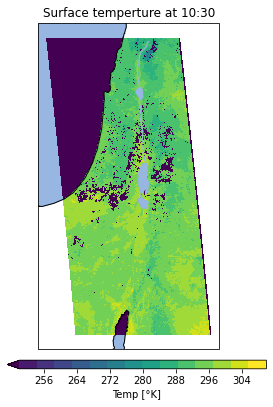

In [ ]:
# MOdis array:

from matplotlib import ticker
import cartopy.crs as ccrs

file_new    = "/content/drive/MyDrive/gdrive_folder/Clipped_new_MOD11A1_03022019.tif"
Temperture_array                  = xr.open_rasterio(file_new)
Temperture_array                  = Temperture_array * 1.0
Temperture_array                  = Temperture_array * 0.02

array_input = Temperture_array

plt.figure(figsize=(9,6))

ax1 = plt.axes(projection=ccrs.Robinson())
ax1.coastlines()
ax1.add_feature(cartopy.feature.OCEAN)
ax1.add_feature(cartopy.feature.LAKES, alpha=1.0)
ax1.add_feature(cartopy.feature.RIVERS)

#gl = ax.gridlines(draw_labels=False)
p1 = array_input.plot(ax=ax1,
             levels=15, vmin=250, vmax=310,
             cmap='viridis',
             transform=ccrs.PlateCarree(),
             add_colorbar=False)

plt.title('Surface temperture at 10:30')

ax_cb = plt.axes([0.325, 0.08, 0.40, 0.02])
tick_locator = ticker.MaxNLocator(nbins=8)
cb = plt.colorbar(p1, cax=ax_cb, orientation='horizontal')
cb.locator = tick_locator
cb.update_ticks()
cb.ax.set_xlabel('Temp [\N{DEGREE SIGN}K]');

### Short wave radiation

In [ ]:
path     = '/content/drive/MyDrive/gdrive_folder/'

LSASAF_MSG_DSSF


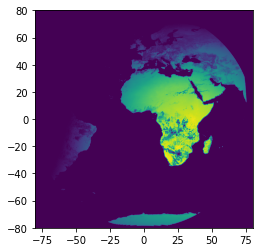

In [ ]:
SAF_file = 'LSASAF_MSG_DSSF_MSG-Disk_201902021000.nc'
SAF_name = SAF_file[0:-25]
print(SAF_name)

rds      = rio.open_rasterio(path + SAF_file) # Read SAF NetCDF file

dset_w84 = rds.rio.reproject("EPSG:4326")# reproject to WG84
dset_w84["DSSF"].rio.to_raster('SAF.tif') # select LST band
raster_LSASAF = rasterio.open('SAF.tif')
array = raster_LSASAF.read(1)
show((raster_LSASAF, 1))

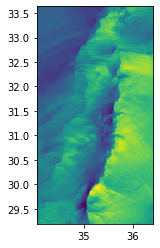

In [ ]:
# now we are calling the wrf u10 file
raster_wrf = rasterio.open(path + 'WRF_u10.tif')
show((raster_wrf, 1))

In [ ]:
minx, miny = raster_wrf.bounds[0], raster_wrf.bounds[1] # copy the coordinates to HERE...
maxx, maxy = raster_wrf.bounds[2], raster_wrf.bounds[3]
bbox = box(minx, miny, maxx, maxy)
print(bbox)

POLYGON ((36.4113665000699 29.1959670650051, 36.4113665000699 33.6360413018845, 34.0301976552919 33.6360413018845, 34.0301976552919 29.1959670650051, 36.4113665000699 29.1959670650051))


In [ ]:
import geopandas as gpd
from fiona.crs import from_epsg

# Insert the bbox into a GeoDataFrame
geo = gpd.GeoDataFrame({'geometry': bbox}, index=[0], crs=from_epsg(4326))

# Re-project into the same coordinate system as the raster data
geo = geo.to_crs(crs=raster_wrf.crs.data)

# Next we need to get the coordinates of the geometry in such a format that rasterio wants them. 
# This can be conducted easily with following function.
def getFeatures(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]
  
# Get the geometry coordinates by using the function
coords = getFeatures(geo)
print(coords)

[{'type': 'Polygon', 'coordinates': [[[36.4113665000699, 29.1959670650051], [36.4113665000699, 33.6360413018845], [34.0301976552919, 33.6360413018845], [34.0301976552919, 29.1959670650051], [36.4113665000699, 29.1959670650051]]]}]


{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -1.0, 'width': 3201, 'height': 3201, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.04999999999999999, 0.0, -80.025,
       0.0, -0.04999999999999999, 80.025)}
4326


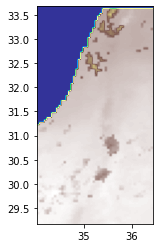

In [ ]:
# Now we are ready to clip the raster with the polygon using the coords 
# variable that we just created. Clipping the raster can be done easily with 
# the mask function that we imported from rasterio, and specifying clip=True.

from rasterio.mask import mask
out_img, out_transform = mask(raster_LSASAF, shapes=coords, crop=True)
out_img[out_img<0] = 0
# Next, we need to modify the metadata. 
# Let’s start by copying the metadata from the original data file.
out_meta = raster_LSASAF.meta.copy()
print(out_meta)

# Next we need to parse the EPSG value from the CRS so that we can create a 
# Proj4 string using PyCRS library (to ensure that the projection information 
# is saved correctly).
epsg_code = int(raster_LSASAF.crs.data['init'][5:])
print(epsg_code)

# Now we need to update the metadata with new dimensions, transform (affine) 
# and CRS (as Proj4 text)
import pycrs
out_meta.update({"driver": "GTiff","height": out_img.shape[1],
                 "width": out_img.shape[2],
                 'dtype': 'float64',
                 "transform": out_transform,
                 "crs": pycrs.parse.from_epsg_code(epsg_code).to_proj4()})

# Finally, we can save the clipped raster to disk with following command
out_tif = path + 'Clipped_' + SAF_name + '.tif'
with rasterio.open(out_tif, "w", **out_meta) as dest:
  dest.write(out_img* 0.01)#NEED TO SCALE
  
# Let’s check that the result is correct by plotting our new clipped raster
clipped_LSASAF = rasterio.open(out_tif)
array = clipped_LSASAF.read(1)
show((clipped_LSASAF, 1), cmap='terrain')

In [ ]:
# We need to resample one of the images to the spatial resolution of the
# other. Let's resample LSASAF 4-km to the 1-km resolution of MODIS

from osgeo import gdal, gdalconst

# The tile needed to be resampled to teh new resolution
inputfile  = out_tif
input      = gdal.Open(inputfile, gdalconst.GA_ReadOnly)
inputProj  = input.GetProjection()
inputTrans = input.GetGeoTransform()

# The reference file for resampling
# ======================================================================================= #
# This is the MODIS raster clipped to the extent of WRF 
# (our reference extent) that we'll use as a reference of our new spatial resolution
# ======================================================================================= #
referencefile = path + 'Clipped_new_MOD11A1_03022019.tif' 
# ======================================================================================= #

reference = gdal.Open(referencefile, gdalconst.GA_ReadOnly)
referenceProj = reference.GetProjection()
referenceTrans = reference.GetGeoTransform()
bandreference = reference.GetRasterBand(1)    
x = reference.RasterXSize 
y = reference.RasterYSize

# The output resampled file (WRF to 1 km)
# ======================================================================================= #
# This is the name we're giving to our new resampled SAF raster file:
# ======================================================================================= #
outputfile = path + 'Clipped_Resampled_1km_' + SAF_name + '.tif'
# ======================================================================================= #
driver= gdal.GetDriverByName('GTiff')
output = driver.Create(outputfile,x,y,1,bandreference.DataType)
output.SetGeoTransform(referenceTrans)
output.SetProjection(referenceProj)

gdal.ReprojectImage(input,output,inputProj,referenceProj,gdalconst.GRA_Bilinear)

del output

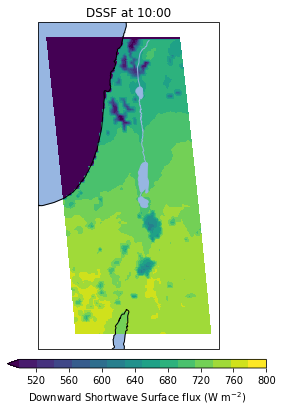

In [ ]:
  
from matplotlib import ticker
import cartopy.crs as ccrs

file_new    = '/content/drive/MyDrive/gdrive_folder/Clipped_Resampled_1km_LSASAF_MSG_DSSF.tif'
LSASAF_DSSF = xr.open_rasterio(file_new)
LSASAF_DSSF = LSASAF_DSSF *10

array_input = LSASAF_DSSF

plt.figure(figsize=(9,6))

ax1 = plt.axes(projection=ccrs.Robinson())
ax1.coastlines()
ax1.add_feature(cartopy.feature.OCEAN)
ax1.add_feature(cartopy.feature.LAKES, alpha=1.0)
ax1.add_feature(cartopy.feature.RIVERS)

#gl = ax.gridlines(draw_labels=False)
p1 = array_input.plot(ax=ax1,
             levels=15, vmin=500, vmax=800,
             cmap='viridis',
             transform=ccrs.PlateCarree(),
             add_colorbar=False)

plt.title('DSSF at 10:00')

ax_cb = plt.axes([0.325, 0.08, 0.40, 0.02])
tick_locator = ticker.MaxNLocator(nbins=8)
cb = plt.colorbar(p1, cax=ax_cb, orientation='horizontal')
cb.locator = tick_locator
cb.update_ticks()
cb.ax.set_xlabel('Downward Shortwave Surface flux (W m$^{-2}$)');

### long wave radiation

LSASAF_MSG_DSLF


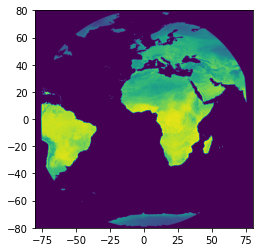

In [ ]:
SAF_file = 'LSASAF_MSG_DSLF_MSG-Disk_201902021000.nc'
SAF_name = SAF_file[0:-25]
print(SAF_name)

rds      = rio.open_rasterio(path + SAF_file) # Read SAF NetCDF file

dset_w84 = rds.rio.reproject("EPSG:4326")# reproject to WG84
dset_w84["DSLF"].rio.to_raster('SAF.tif') # select LST band
raster_LSASAF = rasterio.open('SAF.tif')
array = raster_LSASAF.read(1)
show((raster_LSASAF, 1))

In [ ]:
import geopandas as gpd
from fiona.crs import from_epsg

# Insert the bbox into a GeoDataFrame
geo = gpd.GeoDataFrame({'geometry': bbox}, index=[0], crs=from_epsg(4326))

# Re-project into the same coordinate system as the raster data
geo = geo.to_crs(crs=raster_wrf.crs.data)

# Next we need to get the coordinates of the geometry in such a format that rasterio wants them. 
# This can be conducted easily with following function.
def getFeatures(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]
  
# Get the geometry coordinates by using the function
coords = getFeatures(geo)
print(coords)

[{'type': 'Polygon', 'coordinates': [[[36.4113665000699, 29.1959670650051], [36.4113665000699, 33.6360413018845], [34.0301976552919, 33.6360413018845], [34.0301976552919, 29.1959670650051], [36.4113665000699, 29.1959670650051]]]}]


{'driver': 'GTiff', 'dtype': 'int16', 'nodata': 0.0, 'width': 3201, 'height': 3201, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.04999999999999999, 0.0, -80.025,
       0.0, -0.04999999999999999, 80.025)}
4326


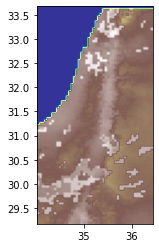

In [ ]:
# Now we are ready to clip the raster with the polygon using the coords 
# variable that we just created. Clipping the raster can be done easily with 
# the mask function that we imported from rasterio, and specifying clip=True.

from rasterio.mask import mask
out_img, out_transform = mask(raster_LSASAF, shapes=coords, crop=True)
out_img[out_img<0] = 0
# Next, we need to modify the metadata. 
# Let’s start by copying the metadata from the original data file.
out_meta = raster_LSASAF.meta.copy()
print(out_meta)

# Next we need to parse the EPSG value from the CRS so that we can create a 
# Proj4 string using PyCRS library (to ensure that the projection information 
# is saved correctly).
epsg_code = int(raster_LSASAF.crs.data['init'][5:])
print(epsg_code)

# Now we need to update the metadata with new dimensions, transform (affine) 
# and CRS (as Proj4 text)
import pycrs
out_meta.update({"driver": "GTiff","height": out_img.shape[1],
                 "width": out_img.shape[2],
                 'dtype': 'float64',
                 "transform": out_transform,
                 "crs": pycrs.parse.from_epsg_code(epsg_code).to_proj4()})

# Finally, we can save the clipped raster to disk with following command
out_tif = path + 'Clipped_' + SAF_name + '.tif'
with rasterio.open(out_tif, "w", **out_meta) as dest:
  dest.write(out_img* 0.01)#NEED TO SCALE
  
# Let’s check that the result is correct by plotting our new clipped raster
clipped_LSASAF = rasterio.open(out_tif)
array = clipped_LSASAF.read(1)
show((clipped_LSASAF, 1), cmap='terrain')

In [ ]:
# We need to resample one of the images to the spatial resolution of the
# other. Let's resample LSASAF 4-km to the 1-km resolution of MODIS

from osgeo import gdal, gdalconst

# The tile needed to be resampled to teh new resolution
inputfile  = out_tif
input      = gdal.Open(inputfile, gdalconst.GA_ReadOnly)
inputProj  = input.GetProjection()
inputTrans = input.GetGeoTransform()

# The reference file for resampling
# ======================================================================================= #
# This is the MODIS raster clipped to the extent of WRF 
# (our reference extent) that we'll use as a reference of our new spatial resolution
# ======================================================================================= #
referencefile = path + 'Clipped_new_MOD11A1_03022019.tif' 
# ======================================================================================= #

reference = gdal.Open(referencefile, gdalconst.GA_ReadOnly)
referenceProj = reference.GetProjection()
referenceTrans = reference.GetGeoTransform()
bandreference = reference.GetRasterBand(1)    
x = reference.RasterXSize 
y = reference.RasterYSize

# The output resampled file (WRF to 1 km)
# ======================================================================================= #
# This is the name we're giving to our new resampled SAF raster file:
# ======================================================================================= #
outputfile = path + 'Clipped_Resampled_1km_' + SAF_name + '.tif'
# ======================================================================================= #
driver= gdal.GetDriverByName('GTiff')
output = driver.Create(outputfile,x,y,1,bandreference.DataType)
output.SetGeoTransform(referenceTrans)
output.SetProjection(referenceProj)

gdal.ReprojectImage(input,output,inputProj,referenceProj,gdalconst.GRA_Bilinear)

del output

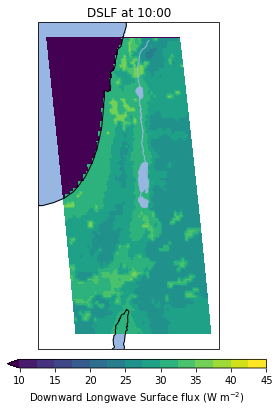

In [ ]:
  
from matplotlib import ticker
import cartopy.crs as ccrs

file_new    = '/content/drive/MyDrive/gdrive_folder/Clipped_Resampled_1km_LSASAF_MSG_DSLF.tif'
LSASAF_DSLF = xr.open_rasterio(file_new)

array_input = LSASAF_DSLF

plt.figure(figsize=(9,6))

ax1 = plt.axes(projection=ccrs.Robinson())
ax1.coastlines()
ax1.add_feature(cartopy.feature.OCEAN)
ax1.add_feature(cartopy.feature.LAKES, alpha=1.0)
ax1.add_feature(cartopy.feature.RIVERS)

#gl = ax.gridlines(draw_labels=False)
p1 = array_input.plot(ax=ax1,
             levels=15, vmin=10, vmax=45,
             cmap='viridis',
             transform=ccrs.PlateCarree(),
             add_colorbar=False)

plt.title('DSLF at 10:00')

ax_cb = plt.axes([0.325, 0.08, 0.40, 0.02])
tick_locator = ticker.MaxNLocator(nbins=8)
cb = plt.colorbar(p1, cax=ax_cb, orientation='horizontal')
cb.locator = tick_locator
cb.update_ticks()
cb.ax.set_xlabel('Downward Longwave Surface flux (W m$^{-2}$)');

### Albedo:

In [ ]:
img = ee.Image("MODIS/006/MOD17A3HGF/2019_02_03").select('Npp');
fc= ee.FeatureCollection('users/davidhelman1/AOI_Israel');


task = ee.batch.Export.image.toDrive(image=img,     # an ee.Image object.
                                     region         = fc.geometry().bounds(), # an ee.Geometry object.
                                     description    = 'ALBEDO_MCD43A3_03022019_500',
                                     folder         = 'gdrive_folder',
                                     fileNamePrefix = 'ALBEDO_MCD43A3_03022019_500',
                                     scale          = 500,
                                     crs='EPSG:4326')
task.start()

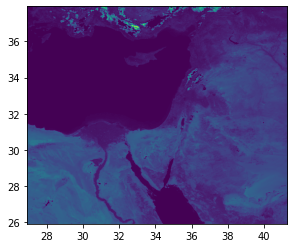

BoundingBox(left=26.913525912220866, bottom=25.92537909968939, right=41.282078881712614, top=37.931362871946796)

In [ ]:
raster_ALBEDO = rasterio.open('/content/drive/MyDrive/gdrive_folder/ALBEDO_MCD43A3_03022019_500.tif')
show((raster_ALBEDO, 1))


# Let's get the coordinates of the tile
raster_ALBEDO.bounds

[{'type': 'Polygon', 'coordinates': [[[36.4113665000699, 29.1959670650051], [36.4113665000699, 33.6360413018845], [34.0301976552919, 33.6360413018845], [34.0301976552919, 29.1959670650051], [36.4113665000699, 29.1959670650051]]]}]
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': None, 'width': 3199, 'height': 2673, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.004491576420597608, 0.0, 26.913525912220866,
       0.0, -0.004491576420597608, 37.931362871946796)}
4326


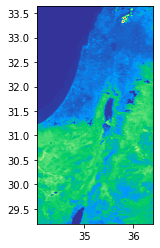

In [ ]:
input_raster =raster_ALBEDO
import geopandas as gpd
from fiona.crs import from_epsg

# Insert the bbox into a GeoDataFrame
geo = gpd.GeoDataFrame({'geometry': bbox}, index=[0], crs=from_epsg(4326))

# Re-project into the same coordinate system as the raster data
geo = geo.to_crs(crs=raster_wrf_1030.crs.data)

# Next we need to get the coordinates of the geometry in such a format that rasterio wants them. 
# This can be conducted easily with following function.
def getFeatures(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]
  
# Get the geometry coordinates by using the function
coords = getFeatures(geo)
print(coords)

from rasterio.mask import mask

# Now we are ready to clip the raster with the polygon using the coords 
# variable that we just created. Clipping the raster can be done easily with 
# the mask function that we imported from rasterio, and specifying clip=True.
out_img, out_transform = mask(input_raster, shapes=coords, crop=True)

# Next, we need to modify the metadata. 
# Let’s start by copying the metadata from the original data file.
out_meta = input_raster.meta.copy()
print(out_meta)

# Next we need to parse the EPSG value from the CRS so that we can create a 
# Proj4 string using PyCRS library (to ensure that the projection information 
# is saved correctly).
epsg_code = int(input_raster.crs.data['init'][5:])
print(epsg_code)

# Now we need to update the metadata with new dimensions, transform (affine) 
# and CRS (as Proj4 text)
import pycrs
out_meta.update({"driver": "GTiff","height": out_img.shape[1],
                 "width": out_img.shape[2],
                 "transform": out_transform,
                 "crs": pycrs.parse.from_epsg_code(epsg_code).to_proj4()})

# Finally, we can save the clipped raster to disk with following command
out_tif = '/content/drive/MyDrive/gdrive_folder/Clipped_ALBEDO_MCD43A3_03022019_500.tif'
with rasterio.open(out_tif, "w", **out_meta) as dest:
  dest.write(out_img)
  
# Let’s check that the result is correct by plotting our new clipped raster
clipped_ALBEDO = rasterio.open(out_tif)
show((clipped_ALBEDO, 1), cmap='terrain')

In [ ]:
# We need to resample the image of albedo to the spatial resolution of the
# other. Let's resample ALBEDO 0.5-km to the 1-km resolution of MODIS

from osgeo import gdal, gdalconst

# The tile needed to be resampled to teh new resolution
inputfile  = out_tif
input      = gdal.Open(inputfile, gdalconst.GA_ReadOnly)
inputProj  = input.GetProjection()
inputTrans = input.GetGeoTransform()

# The reference file for resampling
# ======================================================================================= #
# This is the MODIS raster clipped to the extent of WRF 
# (our reference extent) that we'll use as a reference of our new spatial resolution
# ======================================================================================= #
referencefile = path + 'Clipped_new_MOD11A1_03022019.tif' 
# ======================================================================================= #

reference = gdal.Open(referencefile, gdalconst.GA_ReadOnly)
referenceProj = reference.GetProjection()
referenceTrans = reference.GetGeoTransform()
bandreference = reference.GetRasterBand(1)    
x = reference.RasterXSize 
y = reference.RasterYSize

# The output resampled file (WRF to 1 km)
# ======================================================================================= #
# This is the name we're giving to our new resampled SAF raster file:
# ======================================================================================= #
outputfile = path + 'Clipped_Resampled_1km_ALBEDO_MCD43A3_03022019.tif'
# ======================================================================================= #
driver= gdal.GetDriverByName('GTiff')
output = driver.Create(outputfile,x,y,1,bandreference.DataType)
output.SetGeoTransform(referenceTrans)
output.SetProjection(referenceProj)

gdal.ReprojectImage(input,output,inputProj,referenceProj,gdalconst.GRA_Bilinear)

del output

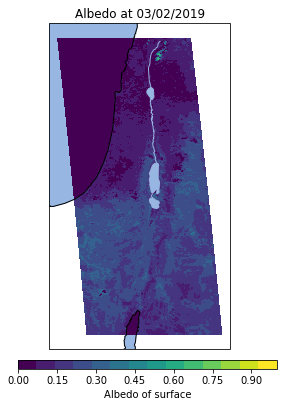

In [ ]:
from matplotlib import ticker
import cartopy.crs as ccrs

file_new    = "/content/drive/MyDrive/gdrive_folder/Clipped_Resampled_1km_ALBEDO_MCD43A3_03022019.tif"
ALBEDO_array = xr.open_rasterio(file_new)
ALBEDO_array                 = ALBEDO_array / 1000

array_input = ALBEDO_array

plt.figure(figsize=(9,6))

ax1 = plt.axes(projection=ccrs.Robinson())
ax1.coastlines()
ax1.add_feature(cartopy.feature.OCEAN)
ax1.add_feature(cartopy.feature.LAKES, alpha=1.0)
ax1.add_feature(cartopy.feature.RIVERS)

#gl = ax.gridlines(draw_labels=False)
p1 = array_input.plot(ax=ax1,
             levels=15, vmin=0, vmax=1,
             cmap='viridis',
             transform=ccrs.PlateCarree(),
             add_colorbar=False)

plt.title('Albedo at 03/02/2019')

ax_cb = plt.axes([0.325, 0.08, 0.40, 0.02])
tick_locator = ticker.MaxNLocator(nbins=8)
cb = plt.colorbar(p1, cax=ax_cb, orientation='horizontal')
cb.locator = tick_locator
cb.update_ticks()
cb.ax.set_xlabel('Albedo of surface');
#print(ALBEDO_array)

### Emissivity:

In [ ]:
img = ee.Image("MODIS/006/MOD11A1/2019_02_03").select('Emis_31');
fc= ee.FeatureCollection('users/davidhelman1/AOI_Israel');

task = ee.batch.Export.image.toDrive(image=img,     # an ee.Image object.
                                     region         = fc.geometry().bounds(), # an ee.Geometry object.
                                     description    = 'Emissivity_MOD11A1_03022019_1000',
                                     folder         = 'gdrive_folder',
                                     fileNamePrefix = 'Emissivity_MOD11A1_03022019_1000',
                                     scale          = 1000,
                                     crs='EPSG:4326')
task.start()

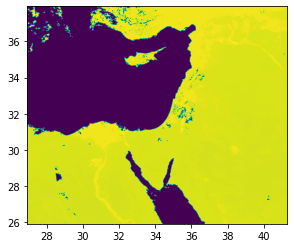

BoundingBox(left=26.913525912220866, bottom=25.92537909968939, right=41.28657045813321, top=37.935854448367394)

In [ ]:
raster_Emissivity = rasterio.open("/content/drive/MyDrive/gdrive_folder/Emissivity_MOD11A1_03022019_1000.tif")
show((raster_Emissivity, 1))


# Let's get the coordinates of the tile
raster_Emissivity.bounds

[{'type': 'Polygon', 'coordinates': [[[36.4113665000699, 29.1959670650051], [36.4113665000699, 33.6360413018845], [34.0301976552919, 33.6360413018845], [34.0301976552919, 29.1959670650051], [36.4113665000699, 29.1959670650051]]]}]
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 1600, 'height': 1337, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.008983152841195215, 0.0, 26.913525912220866,
       0.0, -0.008983152841195215, 37.935854448367394)}
4326


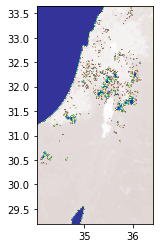

In [ ]:
input_raster = raster_Emissivity
import geopandas as gpd
from fiona.crs import from_epsg

# Insert the bbox into a GeoDataFrame
geo = gpd.GeoDataFrame({'geometry': bbox}, index=[0], crs=from_epsg(4326))

# Re-project into the same coordinate system as the raster data
geo = geo.to_crs(crs=raster_wrf_1030.crs.data)

# Next we need to get the coordinates of the geometry in such a format that rasterio wants them. 
# This can be conducted easily with following function.
def getFeatures(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]
  
# Get the geometry coordinates by using the function
coords = getFeatures(geo)
print(coords)

from rasterio.mask import mask

# Now we are ready to clip the raster with the polygon using the coords 
# variable that we just created. Clipping the raster can be done easily with 
# the mask function that we imported from rasterio, and specifying clip=True.
out_img, out_transform = mask(input_raster, shapes=coords, crop=True)

# Next, we need to modify the metadata. 
# Let’s start by copying the metadata from the original data file.
out_meta = input_raster.meta.copy()
print(out_meta)

# Next we need to parse the EPSG value from the CRS so that we can create a 
# Proj4 string using PyCRS library (to ensure that the projection information 
# is saved correctly).
epsg_code = int(input_raster.crs.data['init'][5:])
print(epsg_code)

# Now we need to update the metadata with new dimensions, transform (affine) 
# and CRS (as Proj4 text)
import pycrs
out_meta.update({"driver": "GTiff","height": out_img.shape[1],
                 "width": out_img.shape[2],
                 "transform": out_transform,
                 "crs": pycrs.parse.from_epsg_code(epsg_code).to_proj4()})

# Finally, we can save the clipped raster to disk with following command
out_tif = '/content/drive/MyDrive/gdrive_folder/Clipped_Emissivity_MOD11A1_03022019_1000.tif'
with rasterio.open(out_tif, "w", **out_meta) as dest:
  dest.write(out_img)
  
# Let’s check that the result is correct by plotting our new clipped raster
clipped_Emissivity = rasterio.open(out_tif)
show((clipped_Emissivity, 1), cmap='terrain')

In [ ]:
# We need to resample the image of albedo to the spatial resolution of the
# other. Let's resample ALBEDO 0.5-km to the 1-km resolution of MODIS

from osgeo import gdal, gdalconst

# The tile needed to be resampled to teh new resolution
inputfile  = out_tif
input      = gdal.Open(inputfile, gdalconst.GA_ReadOnly)
inputProj  = input.GetProjection()
inputTrans = input.GetGeoTransform()

# The reference file for resampling
# ======================================================================================= #
# This is the MODIS raster clipped to the extent of WRF 
# (our reference extent) that we'll use as a reference of our new spatial resolution
# ======================================================================================= #
referencefile = path + 'Clipped_new_MOD11A1_03022019.tif' 
# ======================================================================================= #

reference = gdal.Open(referencefile, gdalconst.GA_ReadOnly)
referenceProj = reference.GetProjection()
referenceTrans = reference.GetGeoTransform()
bandreference = reference.GetRasterBand(1)    
x = reference.RasterXSize 
y = reference.RasterYSize

# The output resampled file (WRF to 1 km)
# ======================================================================================= #
# This is the name we're giving to our new resampled SAF raster file:
# ======================================================================================= #
outputfile = path + 'Clipped_Resampled_1km_Emissivity_MOD11A1_03022019.tif'
# ======================================================================================= #
driver= gdal.GetDriverByName('GTiff')
output = driver.Create(outputfile,x,y,1,bandreference.DataType)
output.SetGeoTransform(referenceTrans)
output.SetProjection(referenceProj)

gdal.ReprojectImage(input,output,inputProj,referenceProj,gdalconst.GRA_Bilinear)

del output

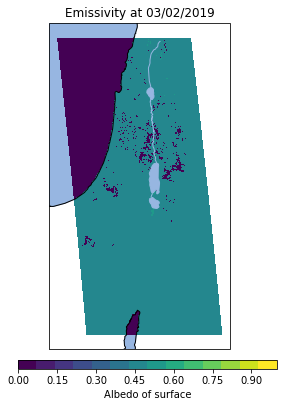

In [ ]:
from matplotlib import ticker
import cartopy.crs as ccrs

file_new    = "/content/drive/MyDrive/gdrive_folder/Clipped_Resampled_1km_Emissivity_MOD11A1_03022019.tif"
Emissivity_array = xr.open_rasterio(file_new)
Emissivity_array = Emissivity_array * 0.002   #the factor of the band appears in GEE

array_input = Emissivity_array

plt.figure(figsize=(9,6))

ax1 = plt.axes(projection=ccrs.Robinson())
ax1.coastlines()
ax1.add_feature(cartopy.feature.OCEAN)
ax1.add_feature(cartopy.feature.LAKES, alpha=1.0)
ax1.add_feature(cartopy.feature.RIVERS)

#gl = ax.gridlines(draw_labels=False)
p1 = array_input.plot(ax=ax1,
             levels=15, vmin=0, vmax=1,
             cmap='viridis',
             transform=ccrs.PlateCarree(),
             add_colorbar=False)

plt.title('Emissivity at 03/02/2019')

ax_cb = plt.axes([0.325, 0.08, 0.40, 0.02])
tick_locator = ticker.MaxNLocator(nbins=8)
cb = plt.colorbar(p1, cax=ax_cb, orientation='horizontal')
cb.locator = tick_locator
cb.update_ticks()
cb.ax.set_xlabel('Albedo of surface');
#print(Emissivity_array)

## Calculating Rn from all the arraies we got: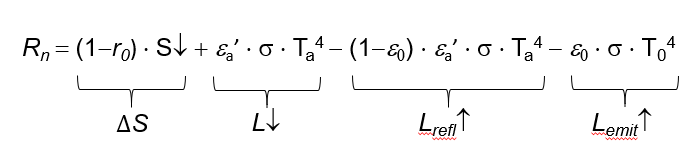


Summary of all the arrays we have:
1. Short wave radiation = LSASAF_DSSF [W*m^-2]
2. Longwave radiation = LSASAF_DSLF [W*m^-2]
3. Albedo = ALBEDO_array [ ]
4. Emissivity = Emissivity_array [ ]
5. Surface temperture = Temperture_array [K] 


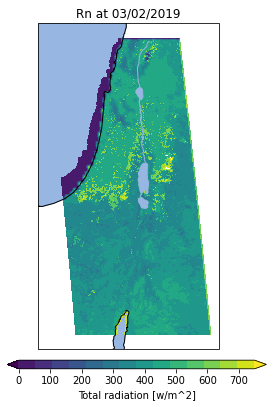

In [ ]:
# Rn calculating:
σ  = 5.6697e-8   # Stefan Bolzman constant [W*m^-2*K^-4]
σ_array = (ALBEDO_array/ALBEDO_array)* σ
Rn_array = (LSASAF_DSSF* (1-ALBEDO_array)) + (LSASAF_DSLF) - (LSASAF_DSLF*(1-Emissivity_array)) - (Emissivity_array *σ_array*(Temperture_array**4))
array_input = Rn_array

plt.figure(figsize=(9,6))

ax1 = plt.axes(projection=ccrs.Robinson())
ax1.coastlines()
ax1.add_feature(cartopy.feature.OCEAN)
ax1.add_feature(cartopy.feature.LAKES, alpha=1.0)
ax1.add_feature(cartopy.feature.RIVERS)

#gl = ax.gridlines(draw_labels=False)
p1 = array_input.plot(ax=ax1,
             levels=15, vmin=0, vmax=750,
             cmap='viridis',
             transform=ccrs.PlateCarree(),
             add_colorbar=False)

plt.title('Rn at 03/02/2019')

ax_cb = plt.axes([0.325, 0.08, 0.40, 0.02])
tick_locator = ticker.MaxNLocator(nbins=8)
cb = plt.colorbar(p1, cax=ax_cb, orientation='horizontal')
cb.locator = tick_locator
cb.update_ticks()
cb.ax.set_xlabel('Total radiation [w/m^2]');